In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import load_model
!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.7 MB/s 
0.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for silence-tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4479 sha256=d6011f3b5a395530e091c7a896738894114bcf8cd03a8ef3c32d888055b5f056
  Stored in directory: /root/.cache/pip/wheels/19/a3/b3/88021fd4ff3a82ed03067ca8935323b55ca23ec8e21b2e44e0
  Created wheel for support-developer: filename=support_developer-1.0.5-py3-none-any.whl size=5650 sha256=cc391500ff34e6ba33ce31fa140efbb853376e10843adc96927e723a673b88f0
  Stored in directory: /root/.cache/pip/wheels/11/5e/63/51e84640e77a7dc5f1e5f5eb597e8f1bc730a2818ee5c3fc03
Successfully built silence-tensorflow support-developer


In [3]:
import os
extracted_noses_dir = "/content/drive/MyDrive/adv_ml_project_vt/extracted_noses_from_extracted_faces"

In [4]:
# extract eyes from extracted_face_image
def extract_nose_from_extratced_face(filename, index, required_size = (200,200)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    try:
        if len(results)>=1:
            #print(results[0])
            xnose= results[0]['keypoints']['nose'][0]-35
            ynose = results[0]['keypoints']['nose'][1]+15
            width = results[0]['keypoints']['nose'][0] +35
            height = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2)+10
            nose = pixels[height:ynose, xnose:width]
            # resize pixels to the model size
            image = Image.fromarray(nose)
            image = image.resize(required_size)
            nose_array = np.asarray(image)
            plt.imshow(nose_array)
            plt.imsave(os.path.join(extracted_noses_dir, 'extracted_nose_img_{}.jpg'.format(index)),nose_array)
            return True
    except:
        None
    return False

In [5]:
#Getting xiaona's git because it contains the coco face images
#!git clone https://github.com/XiaonaZhou/Text_to_Image_analysis.git

In [6]:
files = os.listdir('/content/drive/MyDrive/adv_ml_project_vt/extracted_faces')

1/1 [==============================] - 0s 145ms/step
0
1/1 [==============================] - 0s 160ms/step
1
1/1 [==============================] - 0s 159ms/step
2
1/1 [==============================] - 0s 141ms/step
3
1/1 [==============================] - 0s 149ms/step
4
1/1 [==============================] - 0s 144ms/step
5
1/1 [==============================] - 0s 159ms/step
6
1/1 [==============================] - 0s 147ms/step
7
1/1 [==============================] - 0s 478ms/step
8
1/1 [==============================] - 0s 145ms/step
9
1/1 [==============================] - 0s 150ms/step
10
1/1 [==============================] - 0s 138ms/step
11
1/1 [==============================] - 0s 177ms/step
12
1/1 [==============================] - 0s 154ms/step
13
1/1 [==============================] - 0s 136ms/step
14
1/1 [==============================] - 0s 146ms/step
15
1/1 [==============================] - 0s 159ms/step
16
1/1 [==============================] - 0s 160ms/step
17
1/

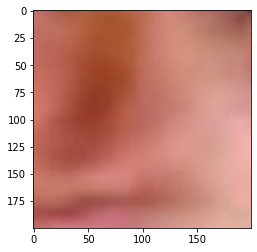

In [7]:
index =0
for file in files:
    if extract_nose_from_extratced_face(os.path.join('/content/drive/MyDrive/adv_ml_project_vt/extracted_faces',file), index = index):
        print(index)
        index+=1